In [11]:
import cv2
import matplotlib.pyplot as plt

In [12]:
# 显示彩色图片
def plt_show1(image):
    b, g, r = cv2.split(image)
    image = cv2.merge([r, g, b])
    plt.imshow(image)
    plt.show()


# 显示灰度化图片
def plt_show(image):
    plt.imshow(image, cmap='gray')
    plt.show()


# 第一步，先处理图片，对图片进行处理，处理过后根据轮廓判断来获取需要的车牌位置
def process_img(image):
    blurred_image = cv2.GaussianBlur(image, (3, 3), 0)  # 高斯去噪
    gray_image = cv2.cvtColor(blurred_image, cv2.COLOR_RGB2GRAY)  # 灰度化处理
    return gray_image

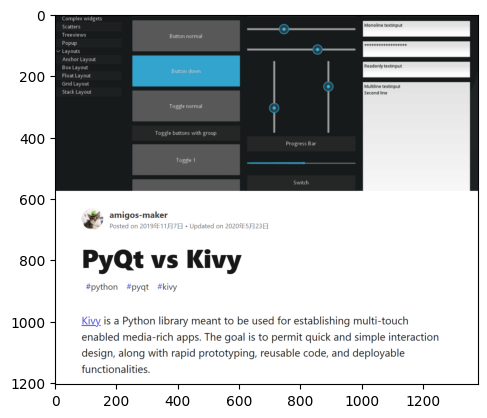

1378


In [13]:
relative_path = './imgs/tm1.png'
test_image = cv2.imread(relative_path)  # 导入图片
plt_show1(test_image)  # 打印图片
height, width1 = test_image.shape[:2] # 获取图片高度和宽度
print(width1)
img = process_img(test_image) # 灰度化处理

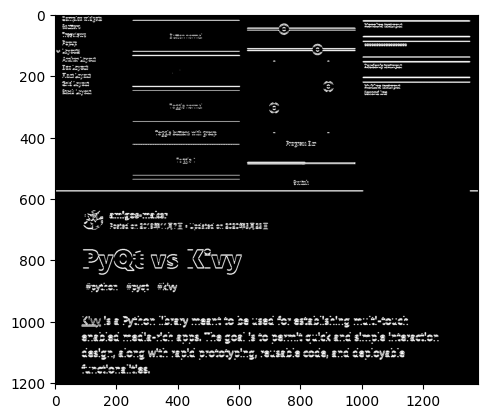

In [14]:
#进行y方向的求导
Sobel_y = cv2.Sobel(img, cv2.CV_16S, 0, 1)
absY = cv2.convertScaleAbs(Sobel_y)
img = absY
ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU) # 二值化
plt_show(img)

574


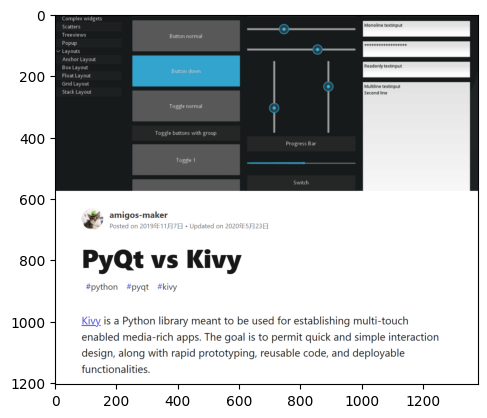

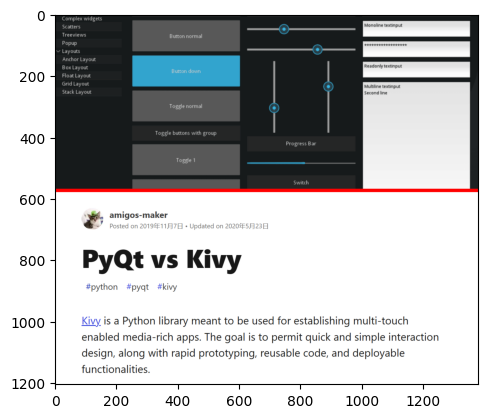

In [15]:
# 获得轮廓
contours, hierarchy = cv2.findContours(img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for item in contours:
    # cv2中，对一个轮廓（contour）调用cv2.boundingRect()函数时，它返回的是一个包含四个整数值的元组，
    # 这四个值分别代表边界矩形的左上角坐标（x, y）以及矩形的宽度（width）和高度（height）。
    rect = cv2.boundingRect(item)
    # 将元组中的值分别赋予给x, y, width, height
    x, y, width, height = rect
    # 根据得到的数值进行条件判断
    if width > 900:
        print(y)
        image1 = test_image.copy()
        plt_show1(test_image)
        image1 = cv2.line(image1, (0, y), (width1, y), (0, 0, 255), 10) # 绘制分割线
        plt_show1(image1)